In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
def loadData(fileName):
    data = []
    with open(fileName, 'r') as f:
        for line in f:
            row = list(map(float, line.strip().split(',')))
            data.append(row)
    return torch.tensor(data, dtype=torch.float32)

trainingSet = loadData("yeast_train.txt")
testingSet = loadData("yeast_test.txt")

In [3]:
class neuralNet(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        super(neuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim = 1)
        return x

In [4]:
def trainModel(model, trainingSet, learning_rate, epochs = 100):
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    criteria = nn.NLLLoss()

    for epochs in range(epochs):
        optimizer.zero_grad()
        outputs = model(trainingSet[:, :-1])
        #temp = F.one_hot(trainingSet[:, -1].long())
        #print(temp)
        classes = trainingSet[:, -1].long() - 1
        loss = criteria(outputs, classes)
        loss.backward()
        optimizer.step()

def testModel(model, testingSet):
    with torch.no_grad():
        outputs = model(testingSet[:, :-1])
        predicted = torch.argmax(outputs, dim = 1)
        correct = (predicted == testingSet[:, -1].long()).sum().item()
        accuracy = 100 * correct / len(testingSet[:, -1])
    return accuracy

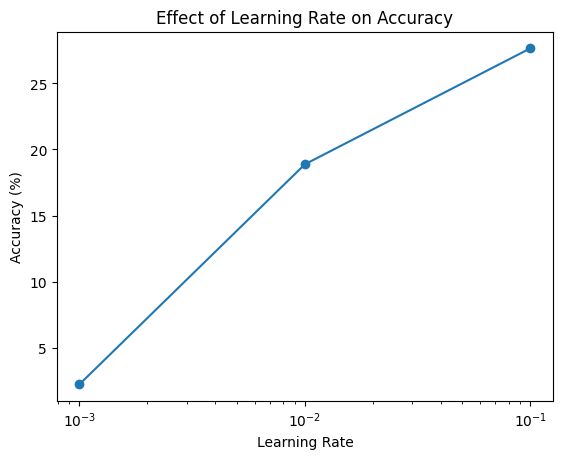

In [8]:
input_size = trainingSet.shape[1] - 1
hidden1_size = 10
hidden2_size = 6
output_size = 11

learning_rate = [0.001, 0.01, 0.1]
accuracies = []

for lr in learning_rate:
    model = neuralNet(input_size, hidden1_size, hidden2_size, output_size)
    trainModel(model, trainingSet, lr)
    accuracy = testModel(model, testingSet)
    accuracies.append(accuracy)

plt.plot(learning_rate, accuracies, marker='o')
plt.title('Effect of Learning Rate on Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (%)')
plt.xscale('log')
plt.show()

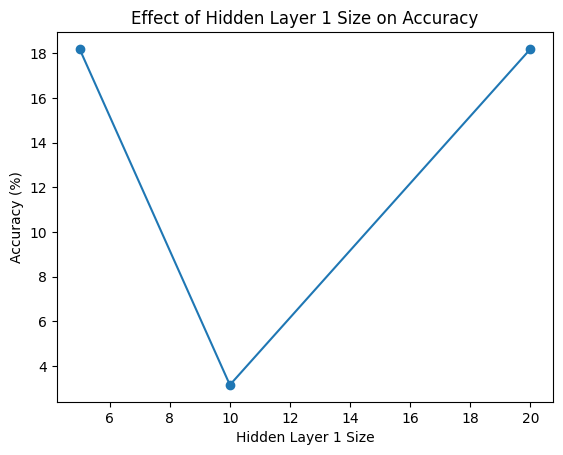

In [9]:
hidden1_values = [5, 10, 20]
hidden2 = 6
learning_rate = 0.01
accuracies = []

for h1 in hidden1_values:
    model = neuralNet(input_size, h1, hidden2, output_size)
    trainModel(model, trainingSet, learning_rate)
    accuracy = testModel(model, testingSet)
    accuracies.append(accuracy)

plt.plot(hidden1_values, accuracies, marker='o')
plt.title('Effect of Hidden Layer 1 Size on Accuracy')
plt.xlabel('Hidden Layer 1 Size')
plt.ylabel('Accuracy (%)')
plt.show()

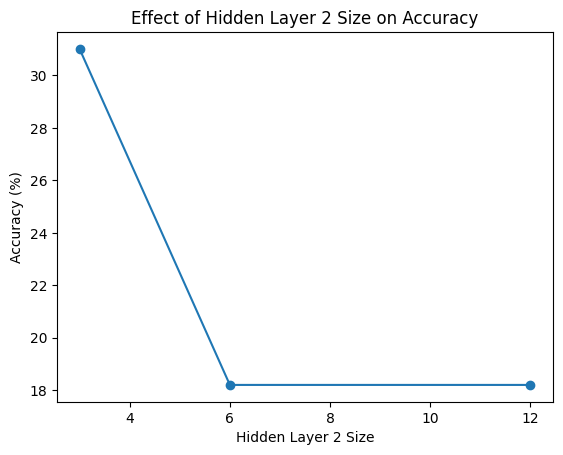

In [10]:
hidden2_values = [3, 6, 12]
hidden1 = 10
learning_rate = 0.01
accuracies = []

for h2 in hidden2_values:
    model = neuralNet(input_size, hidden1, h2, output_size)
    trainModel(model, trainingSet, learning_rate)
    accuracy = testModel(model, testingSet)
    accuracies.append(accuracy)

plt.plot(hidden2_values, accuracies, marker='o')
plt.title('Effect of Hidden Layer 2 Size on Accuracy')
plt.xlabel('Hidden Layer 2 Size')
plt.ylabel('Accuracy (%)')
plt.show()